# Data Workflow Lab 1

Clean and summarize Project 3 data.

### Learning Objectives

* Practice text cleaning techniques
* Practice datatype conversion
* Practice filling in missing values with either 0 or the average in the column
* Practice categorical data techniques
* Transform data into usable quantities


In [441]:
% matplotlib inline
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [391]:
# Load the data
df = pd.read_csv("~/Desktop/Classes/dsi1_exercise_book/notebooks/Iowa_Liquor_sales_sample_10pct.csv", parse_dates=['Date'])
print df.columns
df.head()

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: datetime64

## Clean the data

Let's practice our data cleaning skills on the Project 3 dataset. If you don't remember how to do any of these tasks, look back at your work from the previous weeks or search the internet. There are many blog articles and Stack Overflow posts that cover these topics.

You'll want to complete at least the following tasks:
* Remove redundant columns
* Remove "$" prices from characters and convert values to floats.
* Convert dates to pandas datetime objects
* Convert category floats to integers
* Drop or fill in bad values

In [403]:
# Remove redundant columns

# I do not see any columns that are redundant

In [404]:
# Remove $ from certain columns
# u'State Bottle Cost', u'State Bottle Retail', u'Sale (Dollars)'

In [405]:
df['State Bottle Cost'] = df['State Bottle Cost'].str.strip('$')
df['State Bottle Retail'] = df['State Bottle Retail'].str.strip('$')
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.strip('$')

In [406]:
# Convert dates

#See pd.read_csv(.....


In [407]:
# Drop or replace bad values

df.dropna(inplace=True)

In [408]:
#The below became unecessary after I used head -10000 IowaLiquor.csv > tiny_iowa.csv

(df['Zip Code'] == '712-2').value_counts()
df = df[df['Zip Code'] != '712-2']
(df['Zip Code'] == '712-2').value_counts()

False    269073
Name: Zip Code, dtype: int64

In [409]:
df.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [410]:
# Convert integers

df['Zip Code'] = df['Zip Code'].astype('int64')
df['County Number'] = df['County Number'].astype('int64')
df['State Bottle Cost'] = df['State Bottle Cost'].astype('float64')
df['State Bottle Retail'] = df['State Bottle Retail'].astype('float64')
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype('float64')

df.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                          int64
County Number                     int64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

## Filter the Data

Some stores may have opened or closed in 2015. These data points will heavily skew our models, so we need to filter them out or find a way to deal with them.

You'll need to provide a summary in your project report about these data points. You may also consider using the monthly sales in your model and including other information (number of months or days each store is open) in your data to handle these unusual cases.

Let's record the first and last sales dates for each store. We'll save this information for later when we fit our models.

In [411]:
#df = df[(df.Date >= datetime.datetime(2015,1,1)) & (df.Date < datetime.datetime(2016,1,1))]

In [412]:
# Determine which stores were open all of 2015
# Find the first and last sales date.
# Filter out stores that opened or closed throughout the year
# You may want to save this step until you start modelling

In [413]:
#Create max values
agg_on_store_df_max = df.pivot_table(index='Store Number', aggfunc='max')
agg_on_store_df_max['Date_Max'] = agg_on_store_df_max.Date

#Create min values
agg_on_store_df_min = df.pivot_table(index='Store Number', aggfunc='min')
agg_on_store_df_min['Date_Min'] = agg_on_store_df_min.Date

#Create table with both min and max values
max_date_df = agg_on_store_df_max[['Date_Max']]
min_date_df = agg_on_store_df_min[['Date_Min']]

date_range_df = max_date_df.merge(min_date_df, how='outer', right_index=True, left_index=True)

#Create filter (i.e. new table as a filter)
stores_in_op_df = date_range_df[(date_range_df.Date_Min < datetime.datetime(2015,1,15))] 
stores_in_op_df = date_range_df[(date_range_df.Date_Max > datetime.datetime(2015,12,16))]

#Apply filter to original sales df to filter out stores that did not make sales at the beginning or end of the year
df_filtered = df.merge(stores_in_op_df, left_on='Store Number', right_index=True, how='right')

#Quality test
print stores_in_op_df.index.nunique()
print df_filtered['Store Number'].nunique()

1293
1293


In [414]:
df_filtered.index.nunique()

265778

## Compute New Columns and Tables

Since we're trying to predict sales and/or profits, we'll want to compute some intermediate data. There are a lot of ways to do thisand good use of pandas is crucial. For example, for each transaction we may want to know:
* margin, retail cost minus bottle cost
* price per bottle
* price per liter

We'll need to make a new dataframe that indexes quantities by store:
* sales per store for all of 2015
* sales per store for Q1 2015
* sales per store for Q1 2016
* total volumes sold
* mean transaction revenue, gross margin, price per bottle, price per liter, etc.
* average sales per day
* number of days open

Make sure to retain other variables that we'll want to use to build our models, such as zip code, county number, city, etc. We recommend that you spend some time thinking about the model you may want to fit and computing enough of the suggested quantities to give you a few options.

Bonus tasks:
* Restrict your attention to stores that were open for all of 2015 and Q1 2016. Stores that opened or closed in 2015 will introduce outliers into your data.
* For each transaction we have the item category. You may be able to determine the store type (primarily wine, liquor, all types of alcohol, etc.) by the most common transaction category for each store. This could be a useful categorical variable for modelling. 

In [415]:
# Margin, Price per bottle, and Price per liter
df_filtered['Price_per_bottle'] =  df_filtered['Sale (Dollars)'] / df_filtered['Bottles Sold']
df_filtered['Price_per_liter'] = df_filtered['Sale (Dollars)'] / df_filtered['Volume Sold (Liters)']
df_filtered['Margin'] = df_filtered['Price_per_bottle'] - df_filtered['State Bottle Cost']

In [416]:
#Build filter for Q1 in 2015 and 2016 
df_filtered['Q1_2015_True'] = df_filtered['Date'].between(datetime.datetime(2015,1,1), datetime.datetime(2015,2,28))
df_filtered['Q1_2016_True'] = df_filtered['Date'].between(datetime.datetime(2016,1,1), datetime.datetime(2016,2,28))

#Cheap dirty way to build this into the sales dataframe below
    # 1. Filter out False values
    # 2. Pivot table on Store Number as primary keys
    # 3. Merge with salse dataframe
    
#However, there may be a more pythonic or effecient option... what is it?


In [417]:
def Q1_2015_True_Func(col):
    for x in col:
        if x == True:
            return df_filtered['Volume Sold (Liters)']
        if x == False:
            return 0
        
df_filtered['Q1_2015_Sales'] = df_filtered['Q1_2015_True'].map(Q1_2015_True_Func)

TypeError: 'numpy.bool_' object is not iterable

In [418]:
df_Q1_2015 = df_filtered[df_filtered['Q1_2015_True'] == True]
df_Q1_2016 = df_filtered[df_filtered['Q1_2016_True'] == True]

In [419]:
df_Q1_2015_piv = df_Q1_2015.pivot_table(index='Store Number', aggfunc='sum')
df_Q1_2016_piv = df_Q1_2016.pivot_table(index='Store Number', aggfunc='sum')

In [420]:
df_Q1_2015_piv['q1_2015_sales'] = df_Q1_2015_piv['Sale (Dollars)']
df_Q1_2016_piv['q1_2016_sales'] = df_Q1_2016_piv['Sale (Dollars)']

In [427]:
df_Q1_2015_sales = df_Q1_2015_piv[['q1_2015_sales']]
df_Q1_2016_sales =df_Q1_2016_piv[['q1_2016_sales']]

In [428]:
# Sales per store, 2015
# Filter by our start and end dates
sales = df_filtered

# Group by store name
sales = sales.groupby(by=["Store Number"], as_index=False)

# Compute sums, means
sales = sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price_per_liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0] #,
                   #"Date": sales.Date_Max - sales.Date_Min,
                  }
        )


In [429]:

# Collapse the column indices WOULD BE GREAT TO BREAK THIS DOWN IN CLASS
sales.columns = [' '.join(col).strip() for col in sales.columns.values]

# Rename columns
sales.columns = ['store_num', 
                 'city', 
                 'sale_sum', 
                 'sale_mean', 
                 'county_num', 
                 'zip_code', 
                 'liters_sold_sum', 
                 'liters_sold_mean', 
                 'price_per_liter_mean', 
                 'margin_mean' #,
                 #'days_open'
]

# Quick check
sales.head()

,store_num,city,sale_sum,sale_mean,county_num,zip_code,liters_sold_sum,liters_sold_mean,price_per_liter_mean,margin_mean
0,2106,CEDAR FALLS,176517.45,270.732285,7,50613,11836.10,18.153528,17.869110,5.167822
1,2113,GOWRIE,11376.12,61.826739,94,50543,836.85,4.548098,18.301651,5.429565
2,2130,WATERLOO,139440.02,274.488228,7,50703,8436.27,16.606831,16.963739,5.008799
3,2152,ROCKWELL,8625.74,53.576025,17,50469,720.87,4.477453,12.954562,4.302484
4,2178,WAUKON,29912.68,101.398915,3,52172,2437.92,8.264136,15.866688,4.825627


In [435]:
# sales for all of 2015
# Sales 2015  Q1
# Sales 2016 Q1

sales = sales.merge(df_Q1_2015_sales, how='left', left_on='store_num', right_index=True)
sales = sales.merge(df_Q1_2016_sales, how='left', left_on='store_num', right_index=True)
sales.head()


,store_num,city,sale_sum,sale_mean,county_num,zip_code,liters_sold_sum,liters_sold_mean,price_per_liter_mean,margin_mean,q1_2015_sales_x,q1_2015_sales_y,q1_2016_sales_x,q1_2015_sales,q1_2016_sales_y
0,2106,CEDAR FALLS,176517.45,270.732285,7,50613,11836.10,18.153528,17.869110,5.167822,26440.94,26440.94,20525.78,26440.94,20525.78
1,2113,GOWRIE,11376.12,61.826739,94,50543,836.85,4.548098,18.301651,5.429565,1527.27,1527.27,1620.10,1527.27,1620.10
2,2130,WATERLOO,139440.02,274.488228,7,50703,8436.27,16.606831,16.963739,5.008799,16380.74,16380.74,18209.17,16380.74,18209.17
3,2152,ROCKWELL,8625.74,53.576025,17,50469,720.87,4.477453,12.954562,4.302484,1686.31,1686.31,904.66,1686.31,904.66
4,2178,WAUKON,29912.68,101.398915,3,52172,2437.92,8.264136,15.866688,4.825627,3679.17,3679.17,3785.19,3679.17,3785.19


Proceed with any calculations that you need for your models, such as grouping
sales by zip code, most common vendor number per store, etc. Once you have finished adding columns, be sure to save the dataframe.

In [ ]:
# Compute more things
# ...

In [437]:
# Save this dataframe


#DON'T QUITE UNDERSTAND WHAT THEY ARE SAYING BELOW WOULD BE GOOD TO GO OVER IN CLASS:

# Let's add the dates computed above to this data.
#sales["First Date"] = dates['Date amin']
#sales["Last Date"] = dates['Date amax']



sales.to_csv("sales_post_33.csv")

# Correlation & Analysis

In [439]:
import seaborn as sb

In [438]:
sales.corr()

,store_num,sale_sum,sale_mean,county_num,zip_code,liters_sold_sum,liters_sold_mean,price_per_liter_mean,margin_mean,q1_2015_sales_x,q1_2015_sales_y,q1_2016_sales_x,q1_2015_sales,q1_2016_sales_y
store_num,1.000000,-0.352603,0.040059,-0.003058,0.019740,-0.387902,-0.042921,0.110381,-0.241380,-0.341074,-0.341074,-0.338123,-0.341074,-0.338123
sale_sum,-0.352603,1.000000,0.414805,0.046193,0.014466,0.992820,0.413205,0.139586,0.288144,0.969747,0.969747,0.965640,0.969747,0.965640
sale_mean,0.040059,0.414805,1.000000,0.009210,0.002927,0.406999,0.915174,0.168860,0.402959,0.366932,0.366932,0.413909,0.366932,0.413909
county_num,-0.003058,0.046193,0.009210,1.000000,-0.029030,0.038937,-0.010227,0.097303,0.022503,0.041602,0.041602,0.046829,0.041602,0.046829
zip_code,0.019740,0.014466,0.002927,-0.029030,1.000000,0.016269,-0.032303,0.061694,-0.022567,0.008721,0.008721,0.004935,0.008721,0.004935
liters_sold_sum,-0.387902,0.992820,0.406999,0.038937,0.016269,1.000000,0.432559,0.097926,0.280840,0.957141,0.957141,0.958987,0.957141,0.958987
liters_sold_mean,-0.042921,0.413205,0.915174,-0.010227,-0.032303,0.432559,1.000000,-0.085058,0.284317,0.359826,0.359826,0.403400,0.359826,0.403400
price_per_liter_mean,0.110381,0.139586,0.168860,0.097303,0.061694,0.097926,-0.085058,1.000000,0.409072,0.154554,0.154554,0.127120,0.154554,0.127120
margin_mean,-0.241380,0.288144,0.402959,0.022503,-0.022567,0.280840,0.284317,0.409072,1.000000,0.282861,0.282861,0.282284,0.282861,0.282284
q1_2015_sales_x,-0.341074,0.969747,0.366932,0.041602,0.008721,0.957141,0.359826,0.154554,0.282861,1.000000,1.000000,0.933218,1.000000,0.933218


AttributeError: max must be larger than min in range parameter.

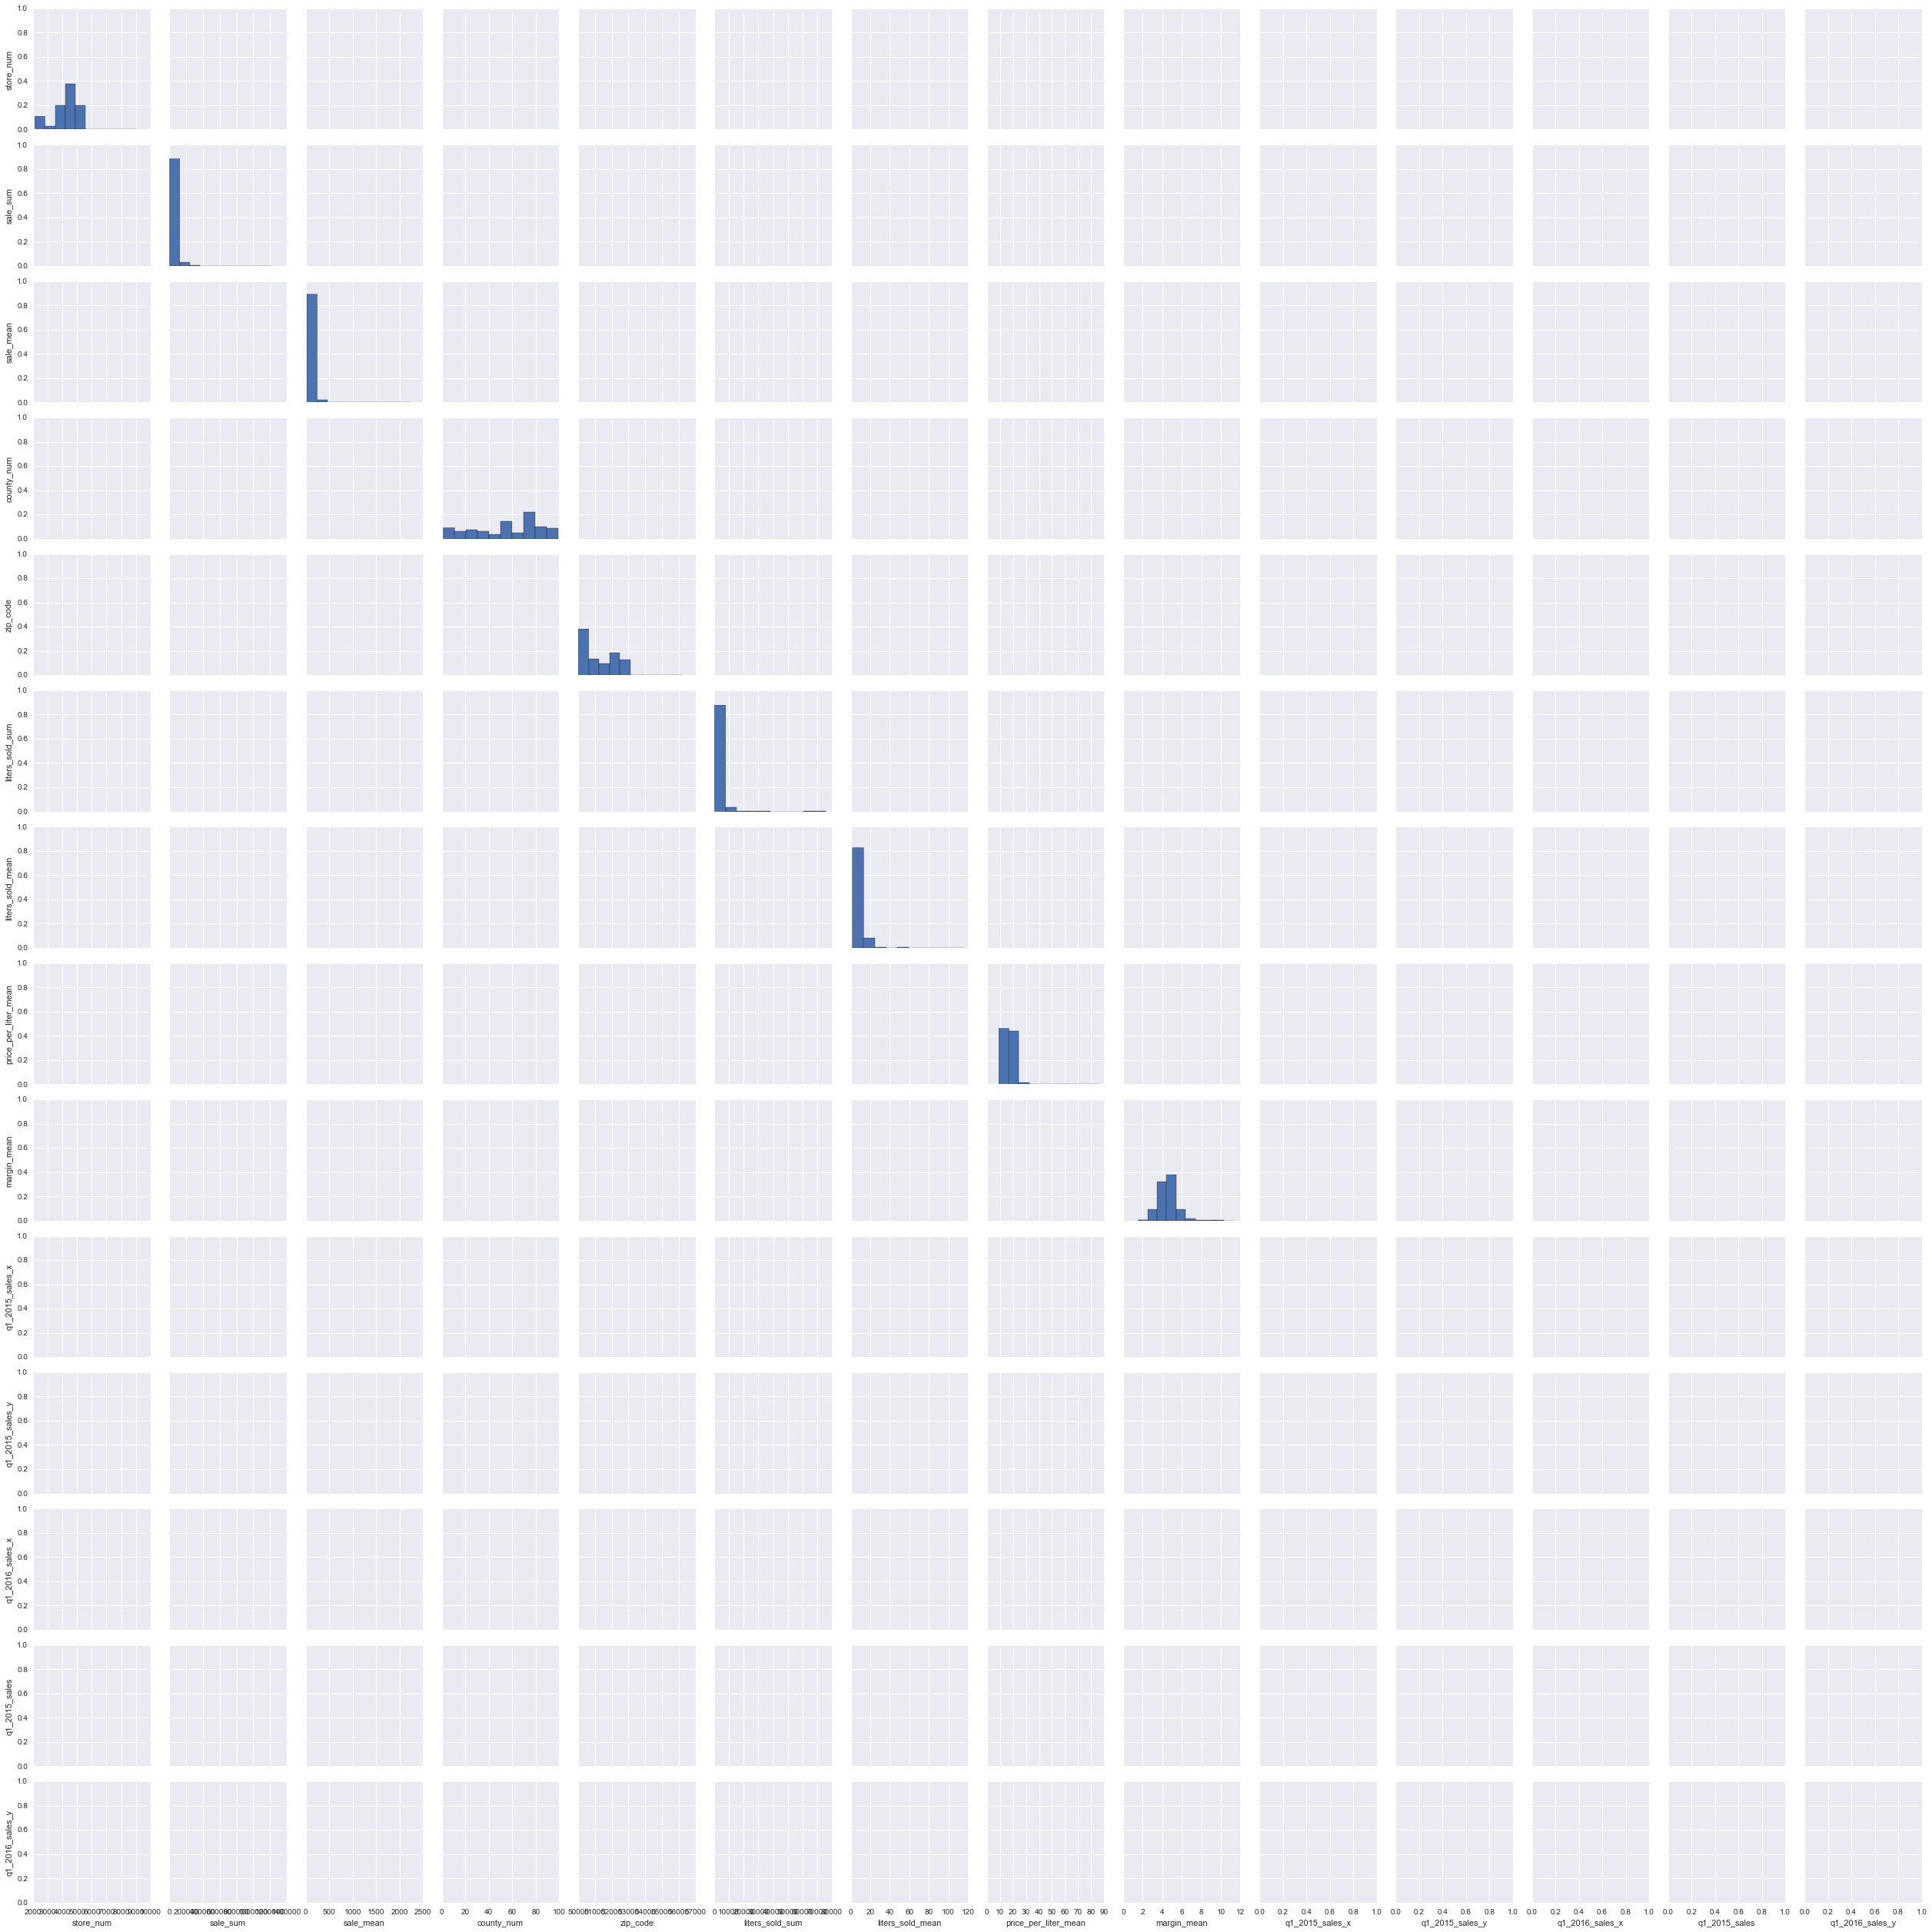

In [440]:
sb.pairplot(sales)

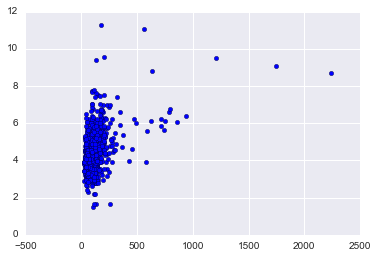

In [448]:
plt.scatter(x='sale_mean', y='margin_mean', data=sales)

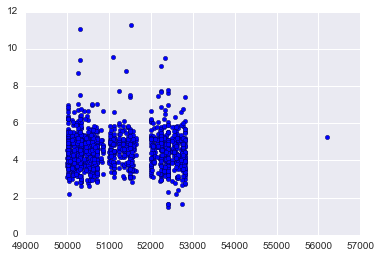

In [449]:
plt.scatter(x='zip_code', y='margin_mean', data=sales)

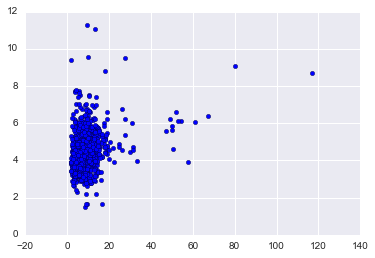

In [451]:
plt.scatter(x='liters_sold_mean', y='margin_mean', data=sales)